# Sentiment Analysis
---

**Creator**: Gokhan Yildirim <br>
**Python Translator**: Lilian Cheung

*Time: 30 minutes*

# Background  

Companies often use text data collected from customer reviews of their products to gain insight into their emotions and behaviors and then act on that knowledge. Today we will be exploring the emotional content of customer reviews for a particular watch sold on Amazon.

### Analytical Objective(s)  
We will apply a sentiment analysis to the customer reviews of this product, starting by conducting a text mining algorithm.  

### Analysis Outline

We will implement the sentiment analysis in three steps: 

1\. Prepare the text data from the reviews by splitting them up into individual words. 

2\. Apply a sentiment analysis to classify the words as being associated with a *positive* or *negative* emotion.

3\. Create data visualizations of these sentiments to learn more about the customers attitudes toward the product.  

# Before You Begin  

Before attempting this assignment using Python you must complete the following steps:

1\. **Install the `nltk`, `pandas`, `numpy`, `string`, `re`, `matplotlib`, `pydata`, `plotnine`, `wordcloud`, and `IPython` packages to your computer, if you have not already done so:**  

   * (a) Open Anaconda Navigator on your computer  
   * (b) Open the CMD.exe Prompt by clicking "Launch" on the appropriate tile  
   * (c) When the terminal window appears, install each package into your environment by running one of the following commands for each package in your terminal. Replace `<package-name>` with the name of the package you want to install, e.g., `pandas`.

`pip install <package-name>` for installation via pip ([Information on pip](https://packaging.python.org/tutorials/installing-packages/))  

*or*

`conda install <package-name>` for installation via Anaconda. This assumes that you are running Python through Anaconda ([Information on installing conda packages](https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/))

2\. **Download the required materials from Section 7.9 on Insendi.** This will include:  
  * `sentiment_analysis.ipynb` - the notebook file that is opened using Jupyter Notebook and allows you to perform the analysis in real time by running each piece of code  
  * `sentiment_analysis.html` - a file that displays the analysis and code as a html document
  * `reviews.xlsx` - an Excel file containing the customer review data
  
3\. **Unzip and save these files to a folder on your computer that is easy to find.**  

4\. **Open the `sentiment_analysis.ipynb` notebook:**  

   * (a) Open Anaconda Navigator on your computer  
   * (b) Open Jupyter Notebook by clicking "Launch" on the appropriate tile  
   * (c) When the browser window opens, use it to navigate to the folder where you have saved the downloaded files  
   * (d) Click the `sentiment_analysis.ipynb` file to open it in a Jupyter Notebook  

# Prepare Your Workspace  

1\. **Import the required libraries and functions**.  

In [1]:
import nltk
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt

from pydata import *
from plotnine import *

from nltk import word_tokenize, punkt
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon

from wordcloud import WordCloud, get_single_color_func

from IPython.display import display, HTML

nltk.download('punkt')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Danielle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Danielle\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

2\. **Import the data** found in `review.xlsx` by calling the function `read_excel` from the `pandas` library, which we have called `pd`. We will store the data in a local variable which we will call `review_data`.

In [2]:
# Import the data
review_data = pd.read_excel('reviews.xlsx')

# Explore the Data

The data used in this analysis is an Excel file with 2 columns: 

* `customer` - a customer identification number  
* `review` - the text review from the customer

The data has been imported as a *data frame*. You can use Python to explore the attributes of a data frame, such as `shape`, which tells you how many rows and columns the data frame contains. 

In [3]:
# How many rows and columns?
review_data.shape

(30, 2)

You can also apply a function of the data frame; for instance, using the `head()` function will print the first five rows.

In [4]:
# Print the first five rows
review_data.head()

,customer,review
0,1,holds the strap (see image). Noticed whilst sa...
1,2,This was my very first smart watch. I must say...
2,3,"Really enjoy this watch. Set up is easy, at le..."
3,4,"A long time Android Wear user, my 3-year-old H..."
4,5,Looked at the £299 Samsung Galaxy watch for a ...


You'll notice that the reviews are too long to properly display in the output. To read the complete text from the first review, use:

In [5]:
# Print the complete text from the first review
display(HTML((review_data[0:1].to_html())))

,customer,review
0,1,"holds the strap (see image). Noticed whilst sat watching movie when the watch simply slipped off my wrist. Contacted Huawei support and advised to send the watch to their Service Centre. After a week I received by post an invoice to repair the watch for £330 as it had ""Physical Damage"". (You can buy a new one on Amazon for £180!) What the ....\nI called Huawei support and raised a complaint as in no way had I damaged the watch. After another week, Huawei called me back and advised that as it had ""Physical Damage"" it was not covered by their warranty and is their ""Final Decision"". The faulty watch is currently on its way back to me... I loved the product but really let down by the company and their assertion that all faults are caused by their customers. Will I buy Huawei again? Probably but I am really am not happy how they treat their customers. I guess companies only show their true colours when something goes wrong (an area Apple shines right?). Shame on you Huawei..."


# Data Preparation

To prepare the data for analysis, we will need to accomplish three tasks:  

1\. Normalize the text  
2\. Tokenize the data  
3\. Exclude stopwords  

*Note:* If you have also worked through this analysis in R, you will notice that we are applying an extra step here. This is due to slight diffrences in how R and Python implement some of these processes and are relatively minor.  



### Normalize the Data

We will start by normalizing the text data by removing punctuation and transforming uppercase characters to lowercase characters. We will define (build) a custom function in Python that we'll call `normalize_string`.  

In [6]:
# Define new function called normalize_string
def normalize_string(input_string: str):
    """
    Take an input string, remove all punctuation, and turn all characters into lowercase characters
    
    :param input_string: Input string
    :return: normalized output_string 
    """
    output_string = input_string.translate(str.maketrans('', '', string.punctuation))
    output_string = output_string.lower()
    return output_string

Now we can apply our new function to the review data and transform it. We will store this normalized data in a new variable called `normalized_review`.  

In [7]:
# Normalize the data
normalized_review = (review_data
    .assign(review = review_data['review'].apply(lambda review: normalize_string(review))))

In [8]:
# Look at the first five rows of normalized_review
normalized_review.head()

,customer,review
0,1,holds the strap see image noticed whilst sat w...
1,2,this was my very first smart watch i must say ...
2,3,really enjoy this watch set up is easy at leas...
3,4,a long time android wear user my 3yearold hw1 ...
4,5,looked at the £299 samsung galaxy watch for a ...


### Tokenize the Data  

At the moment, each review is stored as a single, long, character string. Instead, we want to "tokenize the data", meaning we will split each review up into individual words. The result will be a restructured data set with one token (word) per row. This can be done in Python using the `word_tokenize()` function from the `nltk` package. We will store this tokenized data in a new variable called `tokenized_review`.  

In [9]:
# Tokenize the normalized data
tokenized_review = (normalized_review
                   .assign(review = normalized_review['review'].apply(lambda review: word_tokenize(review)))
                   .explode('review')
                   .reset_index(drop = True))

In [10]:
# Look at the first five rows of tokenized data
tokenized_review.head()

,customer,review
0,1,holds
1,1,the
2,1,strap
3,1,see
4,1,image


### Exclude Stopwords  

Stopwords are words that should be filtered out when applying natural language processing analyses, like the one we are doing here. This includes words that don't provide any meaningful insight, such as "the", "is", and "of".

This is important because we are going to be interested in what words appear most frequently in the data. Without removing stopwords, our most common words will look like this:


In [11]:
# Count how many times each word appears and print the top 10
(tokenized_review
 .rename({'customer': 'count'}, axis = 1)
 .groupby('review')
 .count()
 .sort_values('count', ascending = False)
 [0:9])

,count
review,
the,333
to,207
and,197
a,175
i,167
it,154
watch,143
is,112
for,83


As you can see, the words "the", "to", "and", and "a" are the most commonly used words. However, these words are not helpful for understanding the emotions of the customers. The `nltk` package provides us with a list of English stopwords that should be filtered out.

In [12]:
# Examples of stopwords in English
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

We can apply the code below to remove these stopwords words from our data. We will store the results of this process in an object called `cleaned_review`.  

*Note:* If you have also worked through this analysis in R, you may notice minor differences in the output. This is because the stopwords in the `nltk` package are slightly different than the ones used in the R analysis.  

In [13]:
# Exclude stopwords
cleaned_review = tokenized_review[~tokenized_review['review'].isin(stopwords.words("english"))]

In [14]:
# Count how many times each word appears and print the top 10
(cleaned_review
 .rename({'customer': 'count'}, axis = 1)
 .groupby('review')
 .count()
 .sort_values('count', ascending = False)
 [0:10])

,count
review,
watch,143
phone,31
huawei,29
battery,29
screen,27
use,27
good,26
like,25
wear,24


# Sentiment Analysis

The goal here is to assign a score to each word that represents the *sentiment* being expressed. There are various lexica available to assign these scores; here we will use one developed by Bing Liu and collaborators (see *Additional Resources* at the bottom of this page). Sentiment lexica can be accessed in Python through the `opinion_lexicon` from `nltk`. We can use this information to add a new column to our cleaned review data that will indicate whether each word used in the customer reviews is classified as positive or negative according to the lexicon. We will store this updated data in an object called `complete_review`.  

In [15]:
# Initialize the sentiment column with 'neutral'
complete_review = cleaned_review.assign(sentiment = 'neutral')

# Classify a word as 'positive' if it appears in the list of positive words
complete_review.loc[complete_review['review'].isin(opinion_lexicon.positive()), ['sentiment']] = 'positive'

# Classify a word as 'negative if it appears in the list of negative words
complete_review.loc[complete_review.copy()['review'].isin(opinion_lexicon.negative()), ['sentiment']] = 'negative'

# Look at the first five rows of the complete review data
complete_review.head()

,customer,review,sentiment
0,1,holds,neutral
2,1,strap,neutral
3,1,see,neutral
4,1,image,neutral
5,1,noticed,neutral


What are the most common *positive* words in the customer reviews? To find this, we can filter this data to only consider words that have been determined to be positive, and then count the number of times each of those words appear.  

In [16]:
# Count how many times each positive word appears
all_positive = (complete_review[['review', 'sentiment']]
 .query('sentiment == "positive"')
 .rename({'sentiment': 'count'}, axis = 1)
 .groupby('review')
 .count()
 .sort_values(['count', 'review'], 
              ascending = [False, True]))

# Look at the 10 most common positive words
all_positive[0:10]

,count
review,
good,26
like,25
great,17
easy,13
well,12
smart,11
pretty,8
enough,7
available,6


We can see that "good", "like", and "great" are the three most commonly used words with positive sentiment. Although positive sentiments are appreciated a lot by product managers, negative sentiments tend to be more informative and actionable.

What are the most common *negative* words in the customer reviews?

In [17]:
# Count how many times each positive word appears
all_negative = (complete_review[['review', 'sentiment']]
 .query('sentiment == "negative"')
 .rename({'sentiment': 'count'}, axis = 1)
 .groupby('review')
 .count()
 .sort_values(['count', 'review'], 
              ascending = [False, True]))

# Look at the 10 most common positive words
all_negative[0:10]

,count
review,
problem,11
disappointed,6
issue,6
damage,5
fault,5
issues,4
wrong,4
annoying,3
broke,3


We can see that "problem", "disappointed", and "issue" are the three most commonly used words with negative sentiment. 

We can combine these results to create a table of all of the words found in the complete review data, whether it is positive or negative, and how often it was used. This overall table can be used to create interesting and insightful *data visualizations*. We will store these results in an object called `results_table`.  


In [18]:
# Append counts of positive and negative sentiments
results_table = (all_positive.assign(sentiment = 'positive')
 .append(all_negative.assign(sentiment = 'negative'))
 .reset_index(drop = False)
 .sort_values('count', ascending = False))

# Look at the first ten rows
results_table.head(10)

,review,count,sentiment
0,good,26,positive
1,like,25,positive
2,great,17,positive
3,easy,13,positive
4,well,12,positive
5,smart,11,positive
107,problem,11,negative
6,pretty,8,positive
7,enough,7,positive
11,useful,6,positive


# Data Visualization

### Bar Charts  


The `ggplot()` function from the `plotnine` package can be used to create high quality visualizations. We will apply several steps into a single chunk of code, below. First, we will simplify things by applying a filter to our results table and only consider words that were used more than 5 times. We will then give negative words a negative integer value to make it easier to visualize. The code below includes some additional data wrangling and plotting components, such as labelling the axes.  

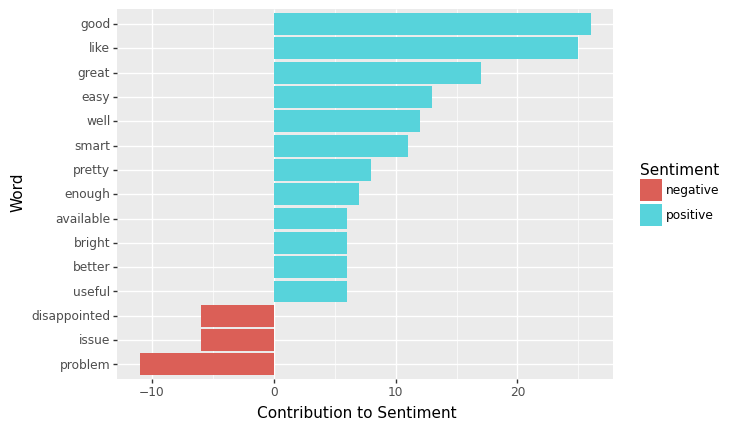

<ggplot: (155486434928)>

In [19]:
# Filter the data and convert counts of negative words to negative values
plot_data = (results_table
            .assign(count = results_table.apply(
     lambda row: row['count'] if row['sentiment'] == 'positive' else -row['count'],
     axis = 1))
 .query('abs(count) > 5')
 .sort_values('count', ascending = True))

# Define the word order by making 'review' a categorical variable
plot_data['review'] = pd.Categorical(plot_data['review'], 
                                            categories = plot_data['review'].astype("string"), 
                                            ordered = True)

(ggplot(data = plot_data, 
        mapping = aes(x = 'review', y = 'count', fill = 'sentiment'))
+ geom_col()
+ coord_flip()
+ labs(y = "Contribution to Sentiment", x = "Word", fill = "Sentiment"))

From this bar chart we can see that "good" is the positive sentiment word with the highest contribution, while "problem" is the negative sentiment word with the highest contribution. 

### Word Clouds  

Another way to visualize the results of the sentiment analysis is to create a word cloud. Word clouds are easy to comprehend for most readers, regardless of their backgrounds. They also tend to be more visually engaging than data presented in a table or barchart. We can use the `WordCloud()` function from the `wordcloud` package to accomplish this. Here, we will start by creating a word cloud of words found in the `cleaned_review` data; that is, the customer review data with the stopwords removed, but no sentiments associated with each word. 


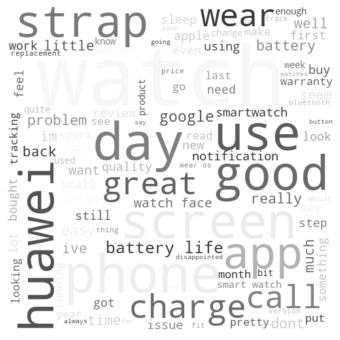

In [20]:
# Plot size and axis settings
plt.rcParams['figure.figsize'] = [6, 6]

# Define tokens to include in the wordcloud
wordcloud_tokens = cleaned_review['review'].to_list()

# Join tokens into a body of text
wordcloud_text = ' '.join(wordcloud_tokens)

# Initialize a wordcloud, and generate a grayscale word cloud from the text
wordcloud = WordCloud(width = 500, 
                      height = 500,
                      max_words = 100,
                      background_color = "white")
wordcloud.generate(wordcloud_text)
wordcloud.recolor(color_func = get_single_color_func('black'))

# Define plot parameters
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The font size of each word is linked to how often it was found in the data, with more common words being displayed in a larger font. This word cloud demonstrates that “watch”, “battery”, “screen”, and “huawei”  are some of the most commonly used words in this sample of customer reviews.  

Next, let's create a word cloud that uses the results of our sentiment analysis to visualize the most commonly used positive and negative words. We'll start by defining a custom function called `color_by_sentiment` that will assign the color "salmon" to negative words and the color "skyblue" to positive words.

In [21]:
def color_by_sentiment(word, 
                       negative_words = all_negative.index.to_list(), 
                       positive_words = all_positive.index.to_list(), 
                       *args,
                       **kwargs):
    """
    Define a custom color function to color positive and negative words in the wordcloud
    
    :param word: String
    :param negative_words: List of negative terms
    :param positive_words: List of positive terms
    :param args: Other args passed to the function by wordcloud.recolor
    :param kwargs: Other kwargs passed to the function by wordcloud.recolor
    :return: Color
    """
    if word in negative_words:
        return 'salmon'
    elif word in positive_words:
        return 'skyblue'

Finally, we will again use the `WordCloud()` function to create a word cloud using only those words that are associated with a positive or negative sentiment.

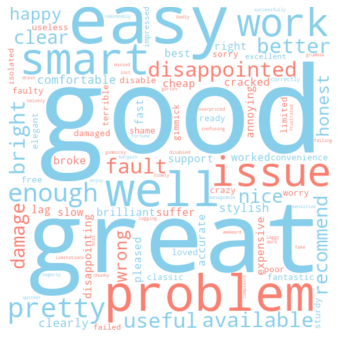

In [23]:
# Define words to include in the cloud, based on positive and negative sentiments only
positive_and_negative_words = complete_review.query('sentiment == "positive" or sentiment == "negative"')
positive_and_negative_words = positive_and_negative_words['review'].to_list()

# Join tokens into a body of text
wordcloud_text = ' '.join(positive_and_negative_words)

# Initialize a wordcloud, and generate a wordcloud colored by positive vs. negative sentiments
wordcloud = WordCloud(width = 500, 
                      height = 500,
                      max_words = 100,
                      background_color = "white")
wordcloud.generate(wordcloud_text)
wordcloud.recolor(color_func = color_by_sentiment)

# Define plot parameters
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We can see that words with a positive sentiment are blue and words with a negative sentiment are red. The results from this cloud resonate with our previous conclusions: the most common positive word is "good", and the most common negative word is "problem".

**Question**: Why do negative customer reviews matter for product managers?

Product managers may want to focus on customer review(s) with the most negative sentiment. 

To do this, we can calculate the proportion of negative sentiment words in each customer review and find the customers with the highest proportion. Here we'll use our original tokenized data; that is, the stopwords have not been removed, nor have the neutral words.  

In [24]:
# Count the total number of words per customer
total_words_per_customer = (tokenized_review
 .groupby('customer')
 .count()
 .rename({'review': 'total_words'}, axis = 1))

# Look at the first five rows
total_words_per_customer.head()

,total_words
customer,
1,179
2,657
3,104
4,258
5,185


In [25]:
# Count the number of negative words per customer
negative_words_per_customer = (complete_review[['customer', 'sentiment']]
 .query('sentiment == "negative"')
 .groupby('customer')
 .count()
 .rename({'sentiment': 'negative_words'}, axis = 1))

# Look at the first five rows
negative_words_per_customer.head()

,negative_words
customer,
1,8
2,20
3,1
4,7
5,4


In [26]:
# Combine these two data frames
results = (pd.concat([total_words_per_customer, negative_words_per_customer], axis = 1))

# Calculate the ratio of negative words per customer and sort in descending order by ratio
(results
 .assign(ratio = results.negative_words/results.total_words)
 .sort_values('ratio', ascending = False)
 .head())

,total_words,negative_words,ratio
customer,,,
15,29,4.0,0.137931
21,170,12.0,0.070588
19,95,6.0,0.063158
24,210,13.0,0.061905
16,67,4.0,0.059701


Here we find that customer number 15 is the customer with the highest proportion of negative sentiment. In a 29 word review, 4 words (13.8%) have been identified as having negative sentiment. You can examine the negativity by checking the original review:  

In [27]:
# Display the review from customer 15
display(HTML((review_data
 .query('customer == 15')
 .to_html())))

,customer,review
14,15,"Very sluggish, freezes and locks up when opening apps, very limited capabilities unless yuou change all your phone apps to the ones available for the watch. Can become unresponsive."


**Question**: How can you act on customer-specific sentiment analysis results?

# Summary

You have reached the end of the session. Well done! 

Social listening is becoming imperative for firms to engage with customers across social media channels. By tracking text data on product reviews, and mentions and conversations in social media platforms, brands can gain significant insights into consumer behaviour and act quickly in the marketplace. Individual-specific automated sentiment analysis allows product managers to offer personalized commmunication and solution to their customers. In this workshop, we have learned how to execute the sentiment anlaysis and visualize sentiments through bar charts and wordclouds. The tools we learned here can be applied to different kinds of products and text data. 

I hope you will have a chance to bring some of these analytical approaches to your organization and create impact with analytics. I wish you the best of luck with your efforts! 

# Additional Resources
If you want to explore some more resources about social listening and sentiment analysis, visit the resources listed below:  

[Arnold, Taylor B. 2016. cleanNLP: A Tidy Data Model for Natural Language Processing](https://cran.r-project.org/package=cleanNLP)

[Arnold, Taylor, and Lauren Tilton. 2016. coreNLP: Wrappers Around Stanford Corenlp Tools](https://cran.r-project.org/package=coreNLP).

[Rinker, Tyler W. 2017. sentimentr: Calculate Text Polarity Sentiment. Buffalo, New York: University at Buffalo/SUNY](http://github.com/trinker/sentimentr)

<https://www.tidytextmining.com/sentiment.html>

[Lexicon from Bing Liu and collaborators](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html)

[AFINN Lexicon](http://www2.imm.dtu.dk/pubdb/pubs/6010-full.html); assigns a score (from -5 to 5) to each word used in the text and indicates the degree of negativity and positivity in the sentiment  

[nrc Lexicon](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm); classifies the sentiment as negative, positive and also a variety of other emotions such as fear, joy, and sadness  